In [40]:
import pandas as pd
import os 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import StringIO
import pydot
import IPython.display

import sklearn.datasets
import sklearn.ensemble

In [3]:
# sklearn contains some nice data sets
b = sklearn.datasets.load_boston()

In [4]:
b.keys()

['data', 'feature_names', 'DESCR', 'target']

In [52]:
print(b['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
boston = pd.DataFrame(data=b['data'], columns=b['feature_names'])
boston['price'] = b['target']

In [28]:
bag = sklearn.ensemble.BaggingRegressor(max_features=3,
                                       n_estimators=25,
                                       max_samples=100,
                                       n_jobs=-1)

In [37]:
# droping a column in pandas
boston_predictors = boston.drop('price', axis=1)
#boston[boston.columns[:-1]]
bag.fit(boston.drop('price', axis=1), boston.price)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=3, max_samples=100,
         n_estimators=25, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

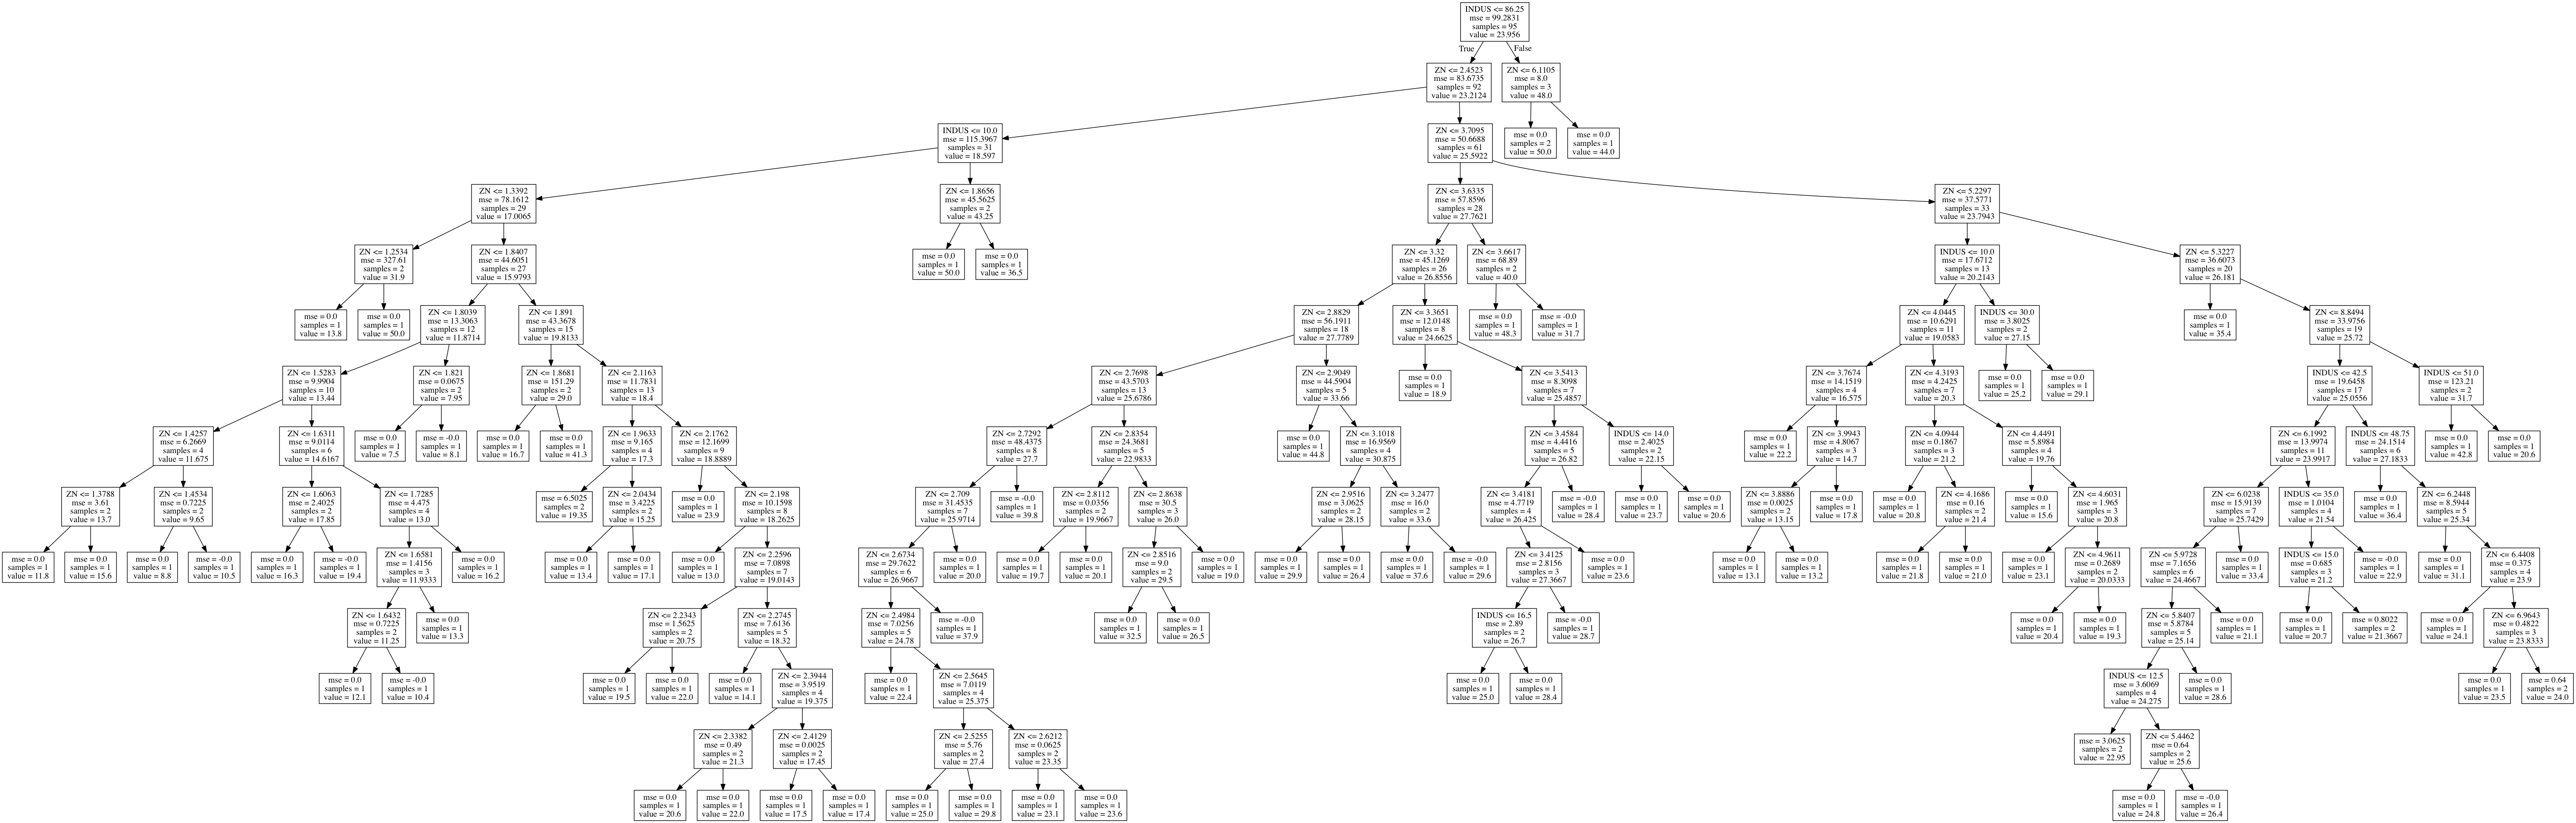

In [38]:
bag.estimators_

s = StringIO.StringIO()
sklearn.tree.export_graphviz(bag.estimators_[24], 
                             out_file=s, 
                             feature_names=boston.columns)
graph = pydot.graph_from_dot_data(s.getvalue())
IPython.display.Image(graph.create_png())

In [39]:
# zip to compare the two
zip(bag.predict(boston_predictors), boston.price)

[(25.681999999999999, 24.0),
 (24.710000000000001, 21.600000000000001),
 (29.870000000000005, 34.700000000000003),
 (30.649000000000001, 33.399999999999999),
 (29.593000000000004, 36.200000000000003),
 (28.173000000000002, 28.699999999999999),
 (22.346, 22.899999999999999),
 (23.866, 27.100000000000001),
 (21.931999999999999, 16.5),
 (22.84, 18.899999999999999),
 (23.456000000000003, 15.0),
 (21.986000000000001, 18.899999999999999),
 (23.390000000000001, 21.699999999999999),
 (20.292666666666669, 20.399999999999999),
 (20.242666666666668, 18.199999999999999),
 (20.690666666666665, 19.899999999999999),
 (20.362666666666666, 23.100000000000001),
 (18.966666666666665, 17.5),
 (17.030666666666665, 20.199999999999999),
 (18.174666666666667, 18.199999999999999),
 (14.078666666666665, 13.6),
 (18.346666666666664, 19.600000000000001),
 (17.582666666666668, 15.199999999999999),
 (17.918666666666667, 14.5),
 (18.718666666666664, 15.6),
 (16.854666666666663, 13.9),
 (19.340666666666667, 16.600000

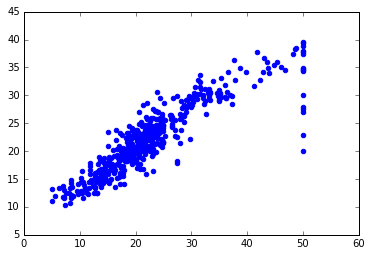

In [42]:
plt.scatter(boston.price, bag.predict(boston_predictors), color='blue')

In [46]:
boston[boston.price >= 50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


In [47]:
rf = sklearn.ensemble.RandomForestRegressor(n_jobs=-1,
                                           n_estimators=100)

In [48]:
rf.fit(boston_predictors, boston.price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

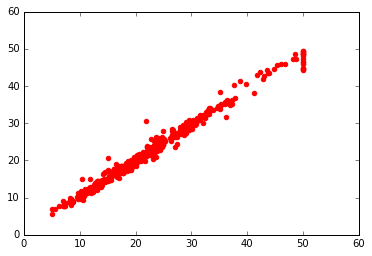

In [50]:
plt.scatter(boston.price, rf.predict(boston_predictors), color='red')